## Data Sources

Unemployment rate: https://br.investing.com/economic-calendar/brazilian-unemployment-rate-411

Covid-19 vaccination: https://ourworldindata.org/covid-vaccinations?country=OWID_WRL

In [1]:
# Import libraries
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Read dataframes
df_unemployment = pd.read_csv('Brazilian_Unemployment.csv')
df_vaccine = pd.read_csv('owid-covid-data-BRA.csv')

In [3]:
# Prepare unemployment DataFrame
df_U = df_unemployment.replace(to_replace = '(?=.*)%', value = '', regex = True)

df_U = df_U.replace(to_replace = ',', value = '.', regex = True)

df_U = df_U[['Lançamento', 'Atual']]

df_U['Date'] = pd.to_datetime(df_U['Lançamento'])
df_U['Unemployment Rate (%)'] = df_U['Atual'].astype(float)

df_U['Period'] = pd.DatetimeIndex(df_U['Date']).to_period('M')

df_U = df_U[['Date', 'Period', 'Unemployment Rate (%)']]

df_U.head()

,Date,Period,Unemployment Rate (%)
0,2022-10-27,2022-10,8.7
1,2022-09-30,2022-09,8.9
2,2022-08-31,2022-08,9.1
3,2022-07-29,2022-07,9.3
4,2022-06-30,2022-06,9.8


In [4]:
# Prepare Covid-19 vaccination DataFrame

df_Vax = df_vaccine[['location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']]

df_Vax['date'] = pd.to_datetime(df_Vax['date'])

df_Vax = df_Vax.fillna(method='ffill').fillna(0)

df_Vax['Keep'] = df_Vax['date'].dt.is_month_end

df_Vax = df_Vax[df_Vax['Keep']]

df_Vax['Period'] = pd.DatetimeIndex(df_Vax['date']).to_period('M')

df_Vax = df_Vax[['location', 'date', 'Period', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']]

df_Vax.head()

<ipython-input-4-c31f6e144ac4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Vax['date'] = pd.to_datetime(df_Vax['date'])


,location,date,Period,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
3,Brazil,2020-02-29,2020-02,0.0,0.0,0.0,0.0
34,Brazil,2020-03-31,2020-03,0.0,0.0,0.0,0.0
64,Brazil,2020-04-30,2020-04,0.0,0.0,0.0,0.0
95,Brazil,2020-05-31,2020-05,0.0,0.0,0.0,0.0
125,Brazil,2020-06-30,2020-06,0.0,0.0,0.0,0.0


In [5]:
# Join DFs
df = pd.merge(df_U, df_Vax, how = 'left', on = 'Period')

df = df.dropna()

df = df[['Period', 'Unemployment Rate (%)', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']]

df.sort_values(by = ['Period'], inplace = True)

df.head()

,Period,Unemployment Rate (%),total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
33,2020-02,11.2,0.0,0.0,0.0,0.0
32,2020-03,11.6,0.0,0.0,0.0,0.0
31,2020-04,12.2,0.0,0.0,0.0,0.0
30,2020-05,12.6,0.0,0.0,0.0,0.0
29,2020-06,12.9,0.0,0.0,0.0,0.0


In [6]:
# Set Date field for ploting
df['Date'] = df['Period'].dt.to_timestamp()

df.head()

,Period,Unemployment Rate (%),total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,Date
33,2020-02,11.2,0.0,0.0,0.0,0.0,2020-02-01
32,2020-03,11.6,0.0,0.0,0.0,0.0,2020-03-01
31,2020-04,12.2,0.0,0.0,0.0,0.0,2020-04-01
30,2020-05,12.6,0.0,0.0,0.0,0.0,2020-05-01
29,2020-06,12.9,0.0,0.0,0.0,0.0,2020-06-01


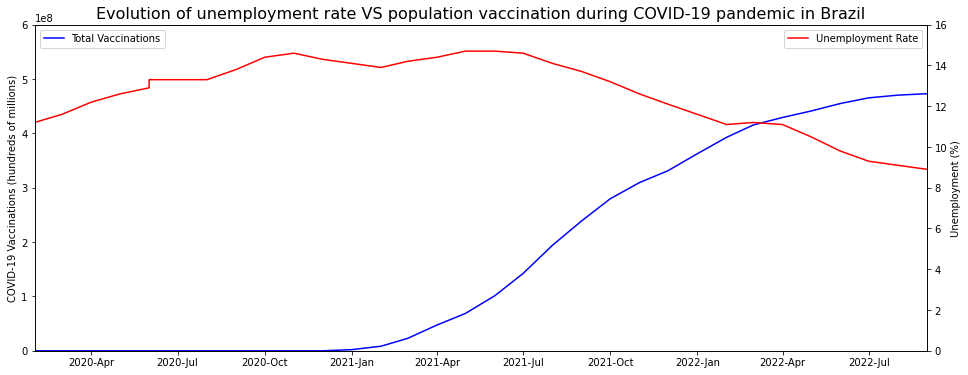

In [7]:
# Plot analysis comparing the unemployment rate in Brazil with the advance of the population vaccination against COVID-19
fig, ax1 = plt.subplots(figsize = (16,6))

ax2 = ax1.twinx()

ax1.plot(df['Date'].values, df['total_vaccinations'].values, color = 'blue')
ax1.set_ylabel('COVID-19 Vaccinations (hundreds of millions)')

ax2.plot(df['Date'].values, df['Unemployment Rate (%)'].values, color = 'red')
ax2.set_ylabel('Unemployment (%)')

ax1.set_xlim(left = df['Date'][33], right = df['Date'][1])
ax1.set_ylim(bottom = 0, top = 600000000)
ax2.set_ylim(bottom = 0, top = 16)

ax1.legend(['Total Vaccinations'], loc = 'upper left')
ax2.legend(['Unemployment Rate'], loc = 'best')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.title('Evolution of unemployment rate VS population vaccination during COVID-19 pandemic in Brazil', fontdict = {'fontsize':16})

plt.savefig('Vaccination_vs_Unemployment_BR.png')

plt.show()